In [12]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import warnings 
from tabulate import tabulate
from scipy import interpolate
from scipy import signal
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import itertools
from tqdm import tqdm
import seaborn as sns
from matplotlib.widgets import Slider, RadioButtons

np.set_printoptions(threshold=np.inf)
sns.set_theme(context='paper', style='white', palette='colorblind',font='helvetica')

In [13]:
%store -r NGRIP_thickness
%store -r NGRIP_age
%store -r NGRIP_depth

%store -r GISP2_thickness
%store -r GISP2_age

%store -r NEEM_thickness
#%store -r NEEM_age
%store -r NEEM_age_copy

NEEM_age = np.copy(NEEM_age_copy)

%store -r EDC_age
%store -r EDC_thickness 

%store -r EDML_age_all
%store -r EDML_depth_all

EDML_thickness = EDML_depth_all[1:] - EDML_depth_all[:-1] 
EDML_age = np.copy(EDML_age_all)

In [14]:
EDML_age_res = EDML_age[1:] - EDML_age[:-1]
EDC_age_res = EDC_age[1:] - EDC_age[:-1]
NGRIP_age_res = NGRIP_age[1:] - NGRIP_age[:-1]
GISP2_age_res = GISP2_age[1:] - GISP2_age[:-1]
NEEM_age_res = NEEM_age[1:] - NEEM_age[:-1]

In [15]:
EDML_kernel_size = 90
EDML_kernel = np.ones(EDML_kernel_size) / EDML_kernel_size
EDML_convolved_t = np.convolve(EDML_thickness, EDML_kernel, mode ='same')
EDML_convolved_a = np.convolve(EDML_age_res, EDML_kernel, mode ='same')

%store EDML_convolved_t
%store EDML_convolved_a

EDC_kernel_size= 90
EDC_kernel = np.ones(EDC_kernel_size) / EDC_kernel_size
EDC_convolved_t = np.convolve(EDC_thickness, EDC_kernel, mode = 'same')
EDC_convolved_a = np.convolve(EDC_age_res, EDC_kernel, mode = 'same')

%store EDC_convolved_t
%store EDC_convolved_a

GISP2_kernel_size= 90
GISP2_kernel = np.ones(GISP2_kernel_size) / GISP2_kernel_size
GISP2_convolved_t = np.convolve(GISP2_thickness, GISP2_kernel, mode = 'same')
GISP2_convolved_a = np.convolve(GISP2_age_res, GISP2_kernel, mode = 'same')

%store GISP2_convolved_t
%store GISP2_convolved_a

NEEM_thickness[NEEM_thickness > 3] = np.nan
NEEM_age_res[NEEM_age_res > 100] = np.nan

NEEM_kernel_size= 1
NEEM_kernel = np.ones(NEEM_kernel_size) / NEEM_kernel_size
NEEM_convolved_t = np.convolve(NEEM_thickness, NEEM_kernel, mode = 'same')
NEEM_convolved_a = np.convolve(NEEM_age_res, NEEM_kernel, mode = 'same')

%store NEEM_convolved_t
%store NEEM_convolved_a

len(EDML_convolved_t), len(EDML_age), len(EDML_age_res)

Stored 'EDML_convolved_t' (ndarray)
Stored 'EDML_convolved_a' (ndarray)
Stored 'EDC_convolved_t' (ndarray)
Stored 'EDC_convolved_a' (ndarray)
Stored 'GISP2_convolved_t' (ndarray)
Stored 'GISP2_convolved_a' (ndarray)
Stored 'NEEM_convolved_t' (ndarray)
Stored 'NEEM_convolved_a' (ndarray)


(113240, 113241, 113240)

In [16]:
EDML_mean_m = np.nanmean(EDML_convolved_t)
EDML_min_m = np.nanmin(EDML_convolved_t)
EDML_max_m = np.nanmax(EDML_convolved_t)
EDML_mean_y = np.nanmean(EDML_convolved_a)
EDML_min_y = np.nanmin(EDML_convolved_a)
EDML_max_y = np.nanmax(EDML_convolved_a)

EDC_mean_m = np.nanmean(EDC_convolved_t)
EDC_min_m = np.nanmin(EDC_convolved_t)
EDC_max_m = np.nanmax(EDC_convolved_t)
EDC_mean_y = np.nanmean(EDC_convolved_a)
EDC_min_y = np.nanmin(EDC_convolved_a)
EDC_max_y = np.nanmax(EDC_convolved_a)

NGRIP_mean_m = np.nanmean(NGRIP_thickness)
NGRIP_min_m = np.nanmin(NGRIP_thickness)
NGRIP_max_m = np.nanmax(NGRIP_thickness)
NGRIP_mean_y = np.nanmean(NGRIP_age_res)
NGRIP_min_y = np.nanmin(NGRIP_age_res)
NGRIP_max_y = np.nanmax(NGRIP_age_res)

GISP2_mean_m = np.nanmean(GISP2_convolved_t)
GISP2_min_m = np.nanmin(GISP2_convolved_t)
GISP2_max_m = np.nanmax(GISP2_convolved_t)
GISP2_mean_y = np.nanmean(GISP2_convolved_a)
GISP2_min_y = np.nanmin(GISP2_convolved_a)
GISP2_max_y = np.nanmax(GISP2_convolved_a)

NEEM_mean_m = np.nanmean(NEEM_convolved_t)
NEEM_min_m = np.nanmin(NEEM_convolved_t)
NEEM_max_m = np.nanmax(NEEM_convolved_t)
NEEM_mean_y = np.nanmean(NEEM_convolved_a)
NEEM_min_y = np.nanmin(NEEM_convolved_a)
NEEM_max_y = np.nanmax(NEEM_convolved_a)


data = [
    ["NGRIP", f"{np.round(NGRIP_min_m,3) }-{np.round(NGRIP_max_m,3)}", np.round(NGRIP_mean_m,3), f"{np.round(NGRIP_min_y,3)}-{np.round(NGRIP_max_y,3)}", np.round(NGRIP_mean_y,3)],
    ["EDML", f"{np.round(EDML_min_m,3) }-{np.round(EDML_max_m,3)}", np.round(EDML_mean_m,3), f"{np.round(EDML_min_y,3)}-{np.round(EDML_max_y,3)}", np.round(EDML_mean_y,3)],
    ["EDC", f"{np.round(EDC_min_m,3) }-{np.round(EDC_max_m,3)}", np.round(EDC_mean_m,3), f"{np.round(EDC_min_y,3)}-{np.round(EDC_max_y,3)}", np.round(EDC_mean_y,3)],
    ["GISP2",f"{np.round(GISP2_min_m,3) }-{np.round(GISP2_max_m,3)}", np.round(GISP2_mean_m,3), f"{np.round(GISP2_min_y,3)}-{np.round(GISP2_max_y,3)}", np.round(GISP2_mean_y,3)],
    ["NEEM", f"{np.round(NEEM_min_m,3) }-{np.round(NEEM_max_m,3)}", np.round(NEEM_mean_m,3), f"{np.round(NEEM_min_y,3)}-{np.round(NEEM_max_y,3)}", np.round(NEEM_mean_y,3)],
]

# Example headers
headers = ["Core", "Res interval (m)", "Res mean (m)", "Res interval (y)", "Res mean (y)"]

# Create the table
table = tabulate(data, headers, tablefmt="fancy_grid")

print(table)

╒════════╤════════════════════╤════════════════╤════════════════════╤════════════════╕
│ Core   │ Res interval (m)   │   Res mean (m) │ Res interval (y)   │   Res mean (y) │
╞════════╪════════════════════╪════════════════╪════════════════════╪════════════════╡
│ NGRIP  │ 0.01-0.01          │          0.01  │ 0.132-1.818        │          0.637 │
├────────┼────────────────────┼────────────────┼────────────────────┼────────────────┤
│ EDML   │ 0.005-0.052        │          0.015 │ 0.171-2.593        │          0.966 │
├────────┼────────────────────┼────────────────┼────────────────────┼────────────────┤
│ EDC    │ 0.01-0.076         │          0.024 │ 0.624-8.148        │          2.113 │
├────────┼────────────────────┼────────────────┼────────────────────┼────────────────┤
│ GISP2  │ 0.1-0.626          │          0.232 │ 1.979-76.178       │         14.944 │
├────────┼────────────────────┼────────────────┼────────────────────┼────────────────┤
│ NEEM   │ 0.006-1.192        │          0.

In [17]:
idx_EDML = np.argwhere( (EDML_convolved_t > 0.01 - 0.000000001) &  (EDML_convolved_t < 0.01 + 0.000000001))

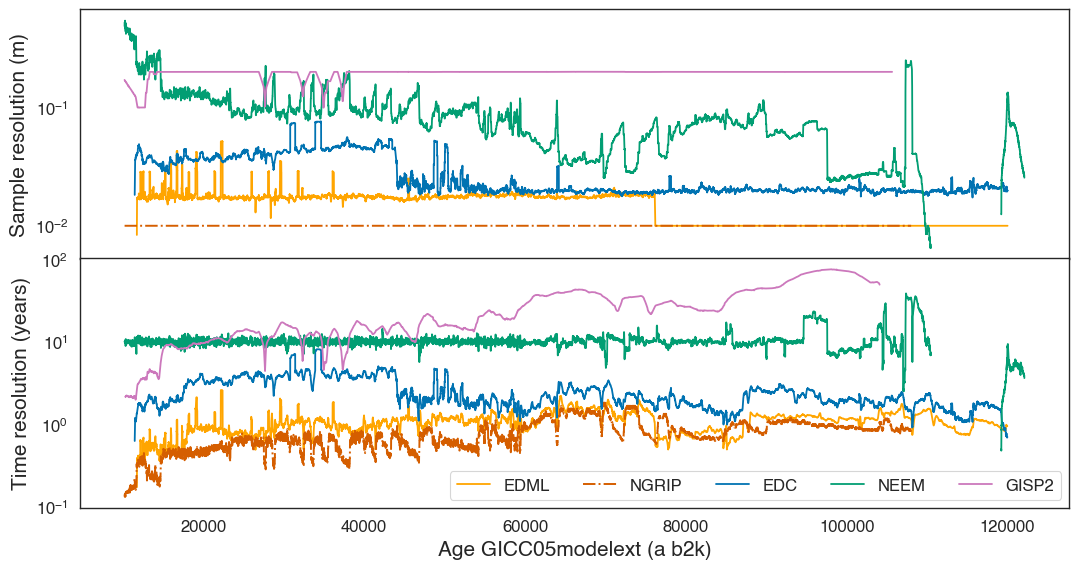

In [18]:
width = 1.3

xticks_label_1 = [10, 20, 30, 40, 50, 60]
xticks_pos_1 = [10*1e3, 20*1e3, 30*1e3, 40*1e3, 50*1e3, 60*1e3]

xticks_label_2 = [60, 70, 80, 90, 100, 110, 120]
xticks_pos_2 = [60*1e3, 70*1e3, 80*1e3, 90*1e3, 100*1e3, 110*1e3, 120*1e3]

fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(10,5), sharex=True)
fig.tight_layout(pad=-1)
ax1.plot(EDML_age[1:], EDML_convolved_t , '-', linewidth=width, label = 'EDML', c='orange')
ax1.plot(NGRIP_age[1:], NGRIP_thickness, '-.', linewidth=1.4, label='NGRIP', c='r')
#plt.plot(EDML_age[1:][idx_EDML], EDML_convolved_t[idx_EDML] , '--', linewidth=width, label = 'EDML', c='orange')
ax1.plot(EDC_age[1:], EDC_convolved_t, '-', linewidth=width, label = 'EDC', c='b', markersize=3)
ax1.plot(NEEM_age, NEEM_convolved_t, '-', linewidth=width, label = 'NEEM', c='g')
ax1.plot(GISP2_age, GISP2_convolved_t , '-', linewidth=width, label ='GISP2', c='m')
#plt.xlim(9000,60000)
ax1.set_yscale('log')
#plt.xticks(xticks_pos_1, xticks_label_1, fontsize=15)
#plt.yticks(fontsize=15)
#ax1.set_xlabel('Age GICC05modelext (a b2k)', fontsize=18)
ax1.set_ylabel('Sample resolution (m)', fontsize=15)
#plt.ylim(0.0,0.5)
#plt.savefig('Sampleres_a_2.jpg', bbox_inches='tight', dpi=1000)
ax1.tick_params(axis='both', labelsize=12)

ax2.plot(EDML_age[1:], EDML_convolved_a , '-', linewidth=width, label = 'EDML', c='orange')
ax2.plot(NGRIP_age[1:], NGRIP_age_res, '-.', linewidth=1.4, label='NGRIP', c='r')
#plt.plot(EDML_age[1:][idx_EDML], EDML_convolved_t[idx_EDML] , '--', linewidth=width, label = 'EDML', c='orange')
ax2.plot(EDC_age[1:], EDC_convolved_a, '-', linewidth=width, label = 'EDC', c='b', markersize=3)
ax2.plot(NEEM_age[1:], NEEM_convolved_a, '-', linewidth=width, label = 'NEEM', c='g')
ax2.plot(GISP2_age[1:], GISP2_convolved_a , '-', linewidth=width, label ='GISP2', c='m')
#plt.xlim(9000,60000)
ax2.set_yscale('log')
#plt.xticks(xticks_pos_1, xticks_label_1, fontsize=15)
#plt.yticks(fontsize=15)
ax2.set_xlabel('Age GICC05modelext (a b2k)', fontsize=15)
ax2.set_ylabel('Time resolution (years)', fontsize=15)
#plt.ylim(0.0,0.5)
#ax2.legend(fontsize=15, ncol=3)
#plt.savefig('Sampleres_a_2.jpg', bbox_inches='tight', dpi=1000)
ax2.tick_params(axis='both', labelsize=12)
ax2.legend(fontsize=12, ncol=5, loc='lower right')
plt.show()



#plt.figure(figsize=(10,5))
#plt.plot(EDML_age[1:], EDML_convolved_t , '-', linewidth=width, label = 'EDML', c='m')
#plt.plot(EDC_age[1:], EDC_convolved_t, '-', linewidth=width, label = 'EDC', c='r', markersize=3)
#plt.plot(NGRIP_age[1:], NGRIP_thickness, '-', linewidth=width, label='NGRIP', c='b')
#plt.plot(GISP2_age, GISP2_convolved_t , '-', linewidth=width, label ='GISP2', c='orange')
#plt.plot(NEEM_age, NEEM_convolved_t, '-', linewidth=width, label = 'NEEM', c='g')
#plt.xlim(60000,125000)
#plt.xticks(xticks_pos_2, xticks_label_2, fontsize=15)
#plt.yticks(fontsize=15)
#plt.yscale('log')
#plt.xlabel('GICC05 age (ka b2k)', fontsize=15)
#plt.ylabel('Sample resolution (m)', fontsize=15)
#plt.ylim(0.0,0.5)
#plt.legend(fontsize=15)
#plt.savefig('Sampleres_b_2.jpg',bbox_inches='tight', dpi=1000)
#plt.show()

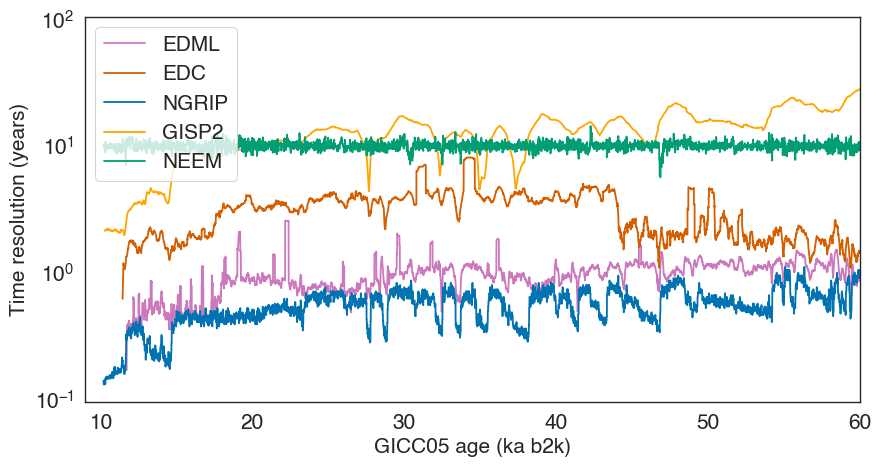

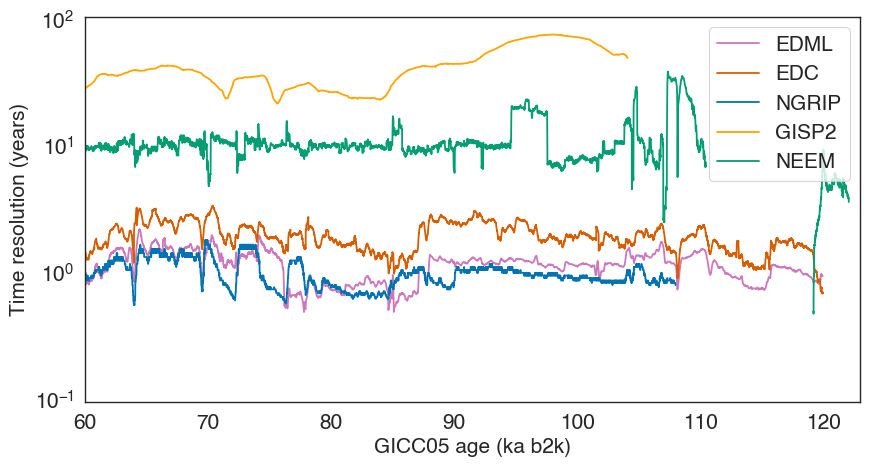

In [19]:
plt.figure(figsize=(10,5))
plt.plot(EDML_age[1:], EDML_convolved_a, linewidth = width, label = "EDML", c='m')
plt.plot(EDC_age[1:], EDC_convolved_a, linewidth = width, label ="EDC", c='r')
plt.plot(NGRIP_age[1:], NGRIP_age_res, linewidth = width, label ="NGRIP", c='b')
plt.plot(GISP2_age[1:], GISP2_convolved_a, linewidth = width, label = "GISP2", c='orange')
plt.plot(NEEM_age[1:], NEEM_convolved_a, linewidth = width, label ="NEEM", c='g')
plt.legend(fontsize=15)
plt.xticks(xticks_pos_1, xticks_label_1, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('GICC05 age (ka b2k)', fontsize=15)
plt.ylabel('Time resolution (years)', fontsize=15)
plt.xlim(9000, 60000)
plt.yscale('log')
#plt.ylim(0,40)
plt.savefig('Sampleres_y_a_2.jpg',bbox_inches='tight', dpi=1000)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(EDML_age[1:], EDML_convolved_a, linewidth = width, label = "EDML", c='m')
plt.plot(EDC_age[1:], EDC_convolved_a, linewidth = width, label ="EDC", c='r')
plt.plot(NGRIP_age[1:], NGRIP_age_res, linewidth = width, label ="NGRIP", c='b')
plt.plot(GISP2_age[1:], GISP2_convolved_a, linewidth = width, label = "GISP2", c='orange')
plt.plot(NEEM_age[1:], NEEM_convolved_a, linewidth = width, label ="NEEM", c='g')
plt.legend(fontsize=15)
plt.yscale('log')
plt.xticks(xticks_pos_2, xticks_label_2, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('GICC05 age (ka b2k)', fontsize=15)
plt.ylabel('Time resolution (years)', fontsize=15)
plt.xlim(60000,123000)
plt.savefig('Sampleres_b_y_2.jpg',bbox_inches='tight', dpi=1000)
plt.show()